In [1]:
void pull(const Int_t n_toys = 10000, const Int_t n_tot_entries = 100, const Int_t nbins = 40, bool do_chi2 = true) {
    TString method_prefix("Log-Likelihood ");
    if (do_chi2)
        method_prefix="#chi^{2} ";
    
    TH1F *h4 = new TH1F(method_prefix+"h4", method_prefix+" Random Gauss", nbins, -4, 4);
    
    h4->SetMarkerStyle(21);
    h4->SetMarkerSize(0.8);
    h4->SetMarkerColor(kRed);
    
    TH1F *sigma = new TH1F(method_prefix+"sigma",
                          method_prefix+"sigma from gaus fit", 50, 0.5, 1.5);
    TH1F *pull = new TH1F(method_prefix+"pull",
                         method_prefix+"pull from gaus fit", 50, -4., 4.);
    
    TCanvas *c0 = new TCanvas(method_prefix+"Gauss",
                             method_prefix+"Gauss",0,0,320,240);
    
    c0->SetGrid();
    
    TCanvas *c1 = new TCanvas(method_prefix+"Result",
                             method_prefix+"Sigma-Distribution",0,300,600,400);
    c0->cd();
    
    Float_t sig, mean;
    for (Int_t i = 0; i<n_toys; ++i) {
        h4->Reset();
        for (Int_t j=0; j<n_tot_entries; ++j)
            h4->Fill(gRandom->Gaus());
        if (do_chi2) h4->Fit("gaus", "q");
        else h4->Fit("gaus", "lq");
        
        if (!(i%100)) {
            h4->Draw("ep");
            c0->Update();
        }
        
        TF1 *fit = h4->GetFunction("gaus");
        sig = fit->GetParameter(2);
        mean= fit->GetParameter(1);
        sigma->Fill(sig);
        pull->Fill(mean/sig * sqrt(n_tot_entries));
    }
    c1->cd();
    pull->Draw();
    c1->Draw();
}

In [2]:
void macro9() {
    cout << "Performing pull expermient with chi2" << endl;
    pull(10000, 100, 40, true);
    cout << "Performing pull experiment with Log Likelihood" << endl;
    pull(10000, 100, 40, false);
}

Performing pull expermient with chi2
Performing pull experiment with Log Likelihood


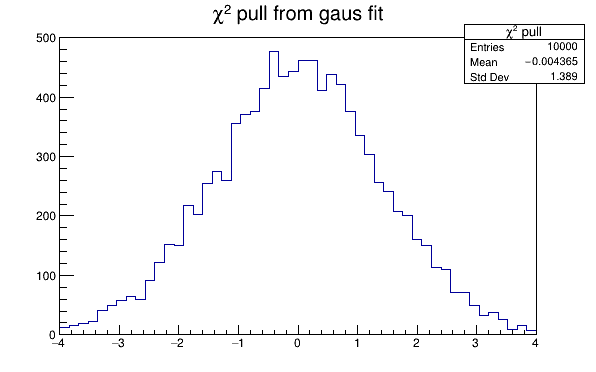

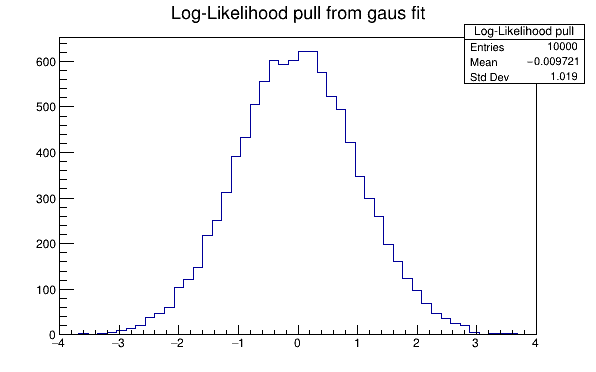

In [3]:
macro9()